In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month') #, date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
from pmdarima.arima import auto_arima

In [5]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, seasonal=True, 
                            d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.17 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.29 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.63 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.67 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.78 sec
 ARIM

In [6]:
print(stepwise_model.aic())

1012.9907965323923


In [14]:
print(stepwise_model)

 ARIMA(0,1,1)(1,1,2)[12]          


In [7]:
train = data.loc['1948-01-01':'1959-01-01']
test = data.loc['1960-01-01':]

In [8]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [9]:
future_forecast = stepwise_model.predict(n_periods=12)

In [10]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers'])

<AxesSubplot:xlabel='Month'>

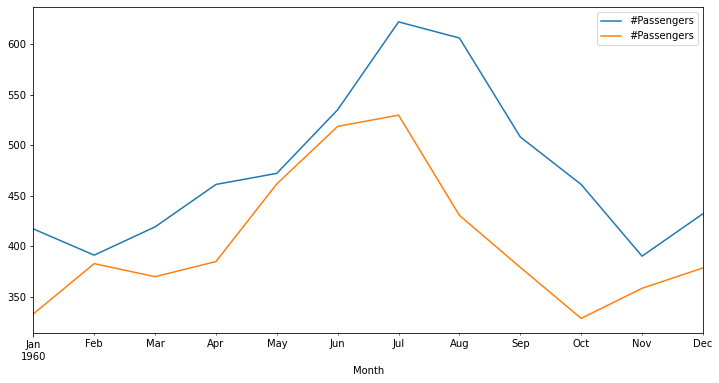

In [11]:
pd.concat([test,future_forecast], axis=1).plot()

<AxesSubplot:xlabel='Month'>

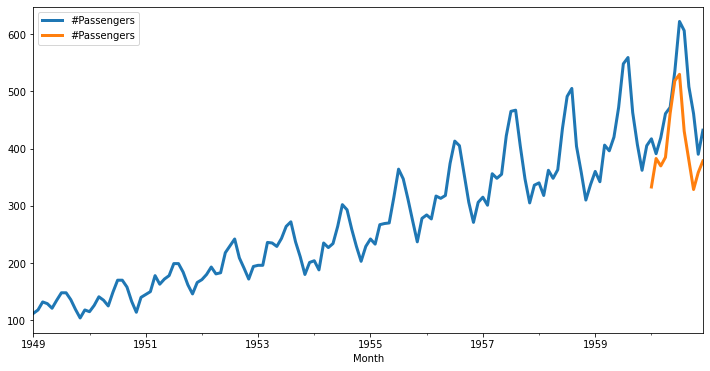

In [12]:
pd.concat([data,future_forecast], axis=1).plot(linewidth=3)